In [1]:
import re
import networkx as nx

NUM_WORDS = 10

In [2]:
def get_words(counter_results):
    words = []
    for word, fre in counter_results:
        words.append(word)
    return words

In [3]:
def get_sentences(content):
    text1 = re.sub(r'[^\.\?\!\s\w\d]', ' ', content)
    text1 = re.sub(r'([\.\?\!])',r'\1 ', text1)
    text1 = text1.replace('\n','').replace('\t','').replace('\r','')
    sentences = re.split(r'[\.\?\!]\s+', text1)
    sentences = [komoran.nouns(sentence) for sentence in sentences if len(sentence)>0]
    return sentences

In [4]:
channel_lst =  ['인스타그램', '커뮤니티', '블로그', '뉴스', '트위터']
for i in channel_lst:
    with open(f'/home/hsung/text_mining/bmax_final_text_data/비맥스_{i}.txt', 'r', encoding='utf8') as p:
        globals()['df_{}'.format(i)] = p.read()



In [5]:
df_인스타그램

'#비맥스메타 #비맥스 #종합비타민 #영양제 #약사 #약국\n. 그분께서는 아름다운 음악과 건강을 함께 주셨다!! 고맙습니다~\n건강할 나를 위해 ㅋㅋㅋㅋ  이젠 챙겨야할 나이구먼.... ㅋㅋ  기쁜 마음으로 감사한 마...\n설연휴에 한가운데.. 당직약국 설연휴 마지막날 오픈한 약국  실장님 악세서리 진열대겸, 키...\n와 곧이어 광고보고 감명받긴 처음.  생각없이 티비보다 곧이어 광고에 강건마가 나오네하고 ...\n너무너무너~~무 피곤해 하시기에 다시 챙기기시작. . 전엔 액티브로 챙겨줬었는데 메타가 나...\n#비맥스메타 ⠀ 요새 많이 피곤했는데~ ⠀ 힘이난다요  ⠀ #효과짱 ⠀ 언니 넘 고마워요 ...\n비맥스 3박스 렛잇비 2박스 어무이아부지랑 같이먹으려고 대량구매했당 ㅋㅋ 나도 렛잇비한번 ...\n#유산균 어쩌다보니 유산균 부자됐네! 딸아기가 꾸준히 먹는 #프로스랩베이비 똑 떨어져서 두...\n드디어 샀다ㅋㅋ 송도 약국들은 적당히 좀 받아먹읍시다ㅡㅡ #비맥스메타\nㅋㅋ 비맥스 메타 먹고 메타 인간 되야지! #비타민 #비맥스메타\n스포츠리서치 오메가3 비맥스메타(비타민B군) 블루보넷 버퍼드 킬레이트 마그네슘 블루보넷 칼...\n#퇴근후 #종로5가 #보령약국 갔다옴 #오메가3 #비맥스메타 #영양제 없이 버틸수가 없다 ...\n_ D-42 (6주)  1. 작년에 회계사 합격하고 미국 교환학생 간 학교 선배가 지금 방...\n비맥스 메타  TVC on air!! 케이블부터 지상파까지!! 여기까지 오기까지 오랜 시간...\nB-MAX is on air  GC녹십자 CHC 브랜드 최초 TVC는 비맥스가. 비맥스가 ...\n#비맥스메타 #이런거챙길나이  #열심히 챙겨먹을께\n약국에 영수증 받으러 갔다가 얘가 뙇하고 보임 전날 추천받은 영양제라서 가격물어보고 얼릉 ...\n"앞으로는 내하고 싶은대로 살란다" . . . #김해서울안경 #비맥스메타 #힘좀내자 #20...\n나에게 맞는 영양제 찾기 :) *구름약국은 모든 온라인판매, 택배판매를 하지 않아요 약국으..

In [6]:
stopwords = ['가탄', '태전동', '칠곡','장영실', '에디슨','양제', '보드게임','하하호호', '지금', '임', '자', '제목', '본문','임',
             '실버','로나', '골드','우루사','오늘', '그램', '우리', '차이', '그램',  '하나', '일동제약', '김혜윤', '강동호',
             '박카스', '이진혁',' 공진단', '세라', '진짜','주년''문재인', '대통령','시우민', '우루사', '비콤','마멜공쥬',
            '현미', '곤약', '밥', '고구마', '치즈', '롤', '스테이크', '물', '물', '컵','띵가띵', '놀고잇엇어','길용우', '배우', '까스', '명수',
            '자가', '키트', '코로나', '와인', '모주', '코스피', '종목', '일동', '전속계약', '오윤수', '씨앤코', '전속계약', 
             '김규리', '최', '희서', '한솥', '밥', '배우', '조우진', '포벨', '종근당', '임팩타민', '아시', '비타민', '메타', '맥스', '녹십자']

In [7]:
from kornounextractor.noun_extractor import extract

In [8]:
# with open('dic.txt', 'w', encoding='utf8') as f:
#     for word in sorted(extract(content, freq=2)):
#         f.write(word+'\tNNG\n')

In [9]:
import konlpy.tag
#komoran = konlpy.tag.Komoran(userdic='dic.txt')

komoran = konlpy.tag.Komoran()

In [10]:
noun_instagram = komoran.nouns(df_인스타그램)
noun_community = komoran.nouns(df_커뮤니티)
noun_blog = komoran.nouns(df_블로그)
noun_news = komoran.nouns(df_뉴스)
noun_twitter = komoran.nouns(df_트위터)

In [11]:
# print(noun_instagram)
# print(noun_community)
# print(noun_blog)

In [12]:
# final_nouns_blog= noun_blog.copy()
# unique_nouns_blog= set(noun_blog)
# for word in unique_nouns_blog:
#     if len(word) == 1: # 1음절 단어 제거하기
#         while word in final_nouns_blog:
#             final_nouns_blog.remove(word)
#     if word in stopwords:
#         while word in final_nouns_blog:
#             final_nouns_blog.remove(word)

In [13]:
noun_lst = [noun_instagram, noun_community, noun_blog, noun_news, noun_twitter]
for t in noun_lst:
    globals()['final_{}'.format(t)] = t.copy()
    globals()['unique_{}'.format(t)] = set(t)
    


            
#1 인스타그램
final_nouns_instagram = noun_instagram.copy()
unique_nouns_instagram = set(noun_instagram)
for word in unique_nouns_instagram:
    if len(word) == 1: # 1음절 단어 제거하기
        while word in final_nouns_instagram:
            final_nouns_instagram.remove(word)
    if word in stopwords:
        while word in final_nouns_instagram:
            final_nouns_instagram.remove(word)
            
# #2 커뮤니티
final_nouns_community = noun_community.copy()
unique_nouns_community = set(noun_community)
for word in unique_nouns_community:
    if len(word) == 1: # 1음절 단어 제거하기
        while word in final_nouns_community:
            final_nouns_community.remove(word)
    if word in stopwords:
        while word in final_nouns_community:
            final_nouns_community.remove(word)
            
# #3 블로그
final_nouns_blog= noun_blog.copy()
unique_nouns_blog= set(noun_blog)
for word in unique_nouns_blog:
    if len(word) == 1: # 1음절 단어 제거하기
        while word in final_nouns_blog:
            final_nouns_blog.remove(word)
    if word in stopwords:
        while word in final_nouns_blog:
            final_nouns_blog.remove(word)

#4 뉴스
final_noun_news= noun_news.copy()
unique_noun_news= set(noun_news)
for word in unique_noun_news:
    if len(word) == 1: # 1음절 단어 제거하기
        while word in final_noun_news:
            final_noun_news.remove(word)
    if word in stopwords:
        while word in final_noun_news:
            final_noun_news.remove(word)

#5 트위터
final_noun_twitter= noun_twitter.copy()
unique_noun_twitter= set(noun_news)
for word in unique_noun_twitter:
    if len(word) == 1: # 1음절 단어 제거하기
        while word in final_noun_twitter:
            final_noun_twitter.remove(word)
    if word in stopwords:
        while word in final_noun_twitter:
            final_noun_twitter.remove(word)

In [14]:
#print(final_noun)

In [15]:
from collections import Counter

insta = Counter(final_nouns_instagram)
community = Counter(final_nouns_community)
blog = Counter(final_nouns_blog)
news = Counter(final_noun_news)
twitter = Counter(final_noun_twitter)

In [16]:
insta.most_common(10)

[('영양제', 87),
 ('피로', 69),
 ('약국', 62),
 ('건강', 59),
 ('선물', 44),
 ('요즘', 36),
 ('추천', 35),
 ('나이', 30),
 ('피곤', 29),
 ('종합', 26)]

In [17]:
community.most_common(10)

[('영양제', 357),
 ('약국', 302),
 ('추천', 110),
 ('가격', 89),
 ('종합', 65),
 ('부탁', 55),
 ('구입', 55),
 ('신분', 52),
 ('구매', 47),
 ('피로', 43)]

In [18]:
blog.most_common(10)

[('약국', 373),
 ('영양제', 178),
 ('후기', 118),
 ('가격', 106),
 ('피로', 103),
 ('함량', 90),
 ('추천', 85),
 ('종합', 74),
 ('구매', 67),
 ('구입', 60)]

In [19]:
news.most_common(10)

[('돌파', 21),
 ('매출', 20),
 ('시리즈', 15),
 ('활성', 9),
 ('함량', 7),
 ('피로', 6),
 ('제약', 4),
 ('건강', 4),
 ('작년', 4),
 ('영양제', 3)]

In [20]:
twitter.most_common(10)

[('약국', 17),
 ('함량', 16),
 ('자', 16),
 ('영양제', 16),
 ('피로', 16),
 ('본문', 15),
 ('상위', 15),
 ('임', 14),
 ('추천', 13),
 ('활성', 12)]

In [21]:
insta_selected_words = get_words(insta.most_common(NUM_WORDS))
community_selected_words = get_words(community.most_common(NUM_WORDS))
blog_selected_words = get_words(blog.most_common(NUM_WORDS))
news_selected_words = get_words(news.most_common(NUM_WORDS))
twitter_selected_words = get_words(twitter.most_common(NUM_WORDS))


In [22]:
insta_selected_words


['영양제', '피로', '약국', '건강', '선물', '요즘', '추천', '나이', '피곤', '종합']

In [23]:
community_selected_words

['영양제', '약국', '추천', '가격', '종합', '부탁', '구입', '신분', '구매', '피로']

In [24]:
blog_selected_words

['약국', '영양제', '후기', '가격', '피로', '함량', '추천', '종합', '구매', '구입']

In [25]:
news_selected_words

['돌파', '매출', '시리즈', '활성', '함량', '피로', '제약', '건강', '작년', '영양제']

In [26]:
twitter_selected_words

['약국', '함량', '자', '영양제', '피로', '본문', '상위', '임', '추천', '활성']

In [27]:
#selected_words = ['교황', '한반도', '북한', '영국', '독일'] # You can selected a list of words based on other criterion
# selected_words

In [28]:
from Kr_sna import do_sna


insta_sentences = get_sentences(df_인스타그램)
community_sentences = get_sentences(df_커뮤니티)

In [29]:
blog_sentences = get_sentences(df_블로그)

In [30]:
news_sentences = get_sentences(df_뉴스)

In [31]:
twitter_sentences = get_sentences(df_트위터)

In [32]:
#sentences = get_sentences(content)
insta_final = do_sna(insta_sentences, insta_selected_words)
community_final = do_sna(community_sentences, community_selected_words)
blog_final = do_sna(blog_sentences, blog_selected_words)
news_final = do_sna(news_sentences, news_selected_words)
twitter_final = do_sna(twitter_sentences, twitter_selected_words)

In [33]:
insta_final.nodes()

NodeView(('영양제', '피로', '약국', '건강', '선물', '요즘', '추천', '나이', '피곤', '종합'))

In [34]:
community_final.nodes()

NodeView(('영양제', '약국', '추천', '가격', '종합', '부탁', '구입', '신분', '구매', '피로'))

In [35]:
blog_final.nodes()

NodeView(('약국', '영양제', '후기', '가격', '피로', '함량', '추천', '종합', '구매', '구입'))

In [36]:
news_final.nodes()

NodeView(('돌파', '매출', '시리즈', '활성', '함량', '피로', '제약', '건강', '작년', '영양제'))

In [37]:
twitter_final.nodes()

NodeView(('약국', '함량', '자', '영양제', '피로', '본문', '상위', '임', '추천', '활성'))

In [38]:
#g.nodes()

In [39]:
insta_final['영양제']

AtlasView({'약국': {'weight': 17}, '종합': {'weight': 8}, '피곤': {'weight': 4}, '요즘': {'weight': 9}, '건강': {'weight': 15}, '추천': {'weight': 8}, '나이': {'weight': 9}, '피로': {'weight': 14}, '선물': {'weight': 6}})

In [40]:
community_final['영양제']

AtlasView({'종합': {'weight': 15}, '추천': {'weight': 50}, '신분': {'weight': 13}, '약국': {'weight': 74}, '부탁': {'weight': 27}, '구입': {'weight': 17}, '구매': {'weight': 16}, '가격': {'weight': 15}, '피로': {'weight': 8}})

In [41]:
blog_final['약국']

AtlasView({'피로': {'weight': 48}, '구입': {'weight': 38}, '추천': {'weight': 41}, '가격': {'weight': 47}, '후기': {'weight': 55}, '함량': {'weight': 47}, '영양제': {'weight': 80}, '구매': {'weight': 43}, '종합': {'weight': 32}})

In [42]:
news_final['돌파']

AtlasView({'건강': {'weight': 1}, '제약': {'weight': 1}, '함량': {'weight': 2}, '매출': {'weight': 3}, '작년': {'weight': 3}, '활성': {'weight': 1}, '피로': {'weight': 1}, '시리즈': {'weight': 2}, '영양제': {'weight': 1}})

In [43]:
twitter_final['약국']

AtlasView({'피로': {'weight': 1}, '임': {'weight': 2}, '영양제': {'weight': 1}})

In [48]:
nx.write_graphml(twitter_final, 'bmax_twitter.graphml')

In [47]:
x = nx.degree_centrality(g)
sorted(x.items(), key=lambda kv: kv[1], reverse=True)

[('비타민', 1.0),
 ('피로', 1.0),
 ('약국', 1.0),
 ('함량', 1.0),
 ('영양제', 1.0),
 ('피곤', 1.0),
 ('선물', 1.0),
 ('건강', 0.8888888888888888),
 ('요즘', 0.8888888888888888),
 ('활성', 0.7777777777777777)]

In [48]:
x = nx.closeness_centrality(g)
sorted(x.items(), key=lambda kv: kv[1], reverse=True)

[('비타민', 1.0),
 ('피로', 1.0),
 ('약국', 1.0),
 ('함량', 1.0),
 ('영양제', 1.0),
 ('피곤', 1.0),
 ('선물', 1.0),
 ('건강', 0.9),
 ('요즘', 0.9),
 ('활성', 0.8181818181818182)]

In [49]:
x = nx.betweenness_centrality(g)
sorted(x.items(), key=lambda kv: kv[1], reverse=True)

[('비타민', 0.007936507936507936),
 ('피로', 0.007936507936507936),
 ('약국', 0.007936507936507936),
 ('함량', 0.007936507936507936),
 ('영양제', 0.007936507936507936),
 ('피곤', 0.007936507936507936),
 ('선물', 0.007936507936507936),
 ('건강', 0.0),
 ('활성', 0.0),
 ('요즘', 0.0)]

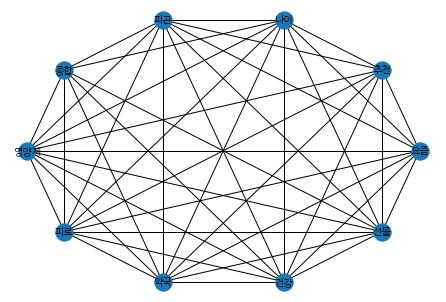

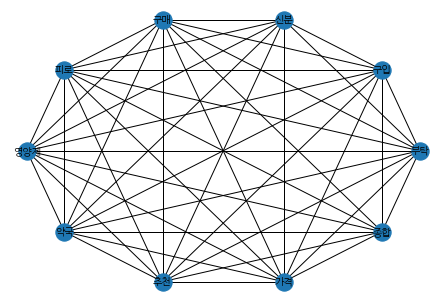

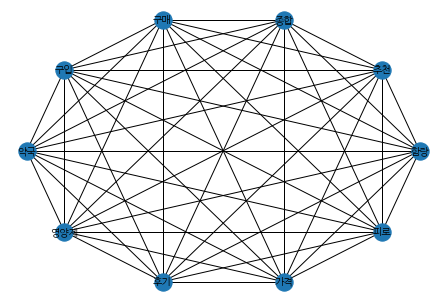

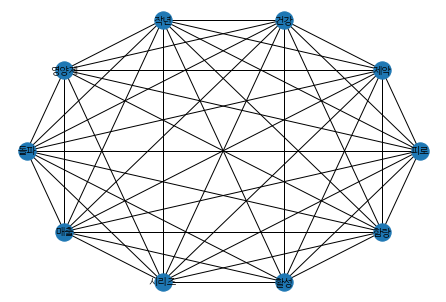

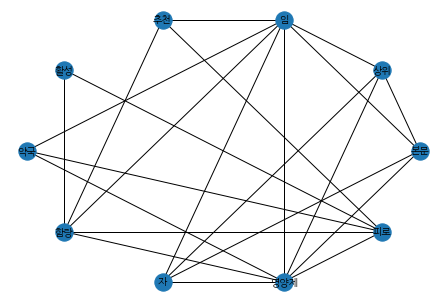

In [135]:
import matplotlib.pyplot as plt
font_name = 'NanumGothic'
final_list = [insta_final,community_final,blog_final, news_final, twitter_final]
for i in final_list:
    pos=nx.shell_layout(i)
    nx.draw(i, pos)
    nx.draw_networkx_labels(i, pos, font_family=font_name, font_size=10)
    plt.show()